In [17]:
import requests
import xarray as xr
import pandas as pd
import os
import zipfile
import urllib
from bs4 import BeautifulSoup
import numpy as np
import math
import smplotlib
import matplotlib.pyplot as plt
import matplotlib
import scipy

In [18]:
def nmdb_get(startdate, enddate, station="JUNG"):
    sy,sm,sd = str(startdate).split("-")
    ey,em,ed = str(enddate).split("-")
    url = "http://nest.nmdb.eu/draw_graph.php?formchk=1&stations[]={station}&tabchoice=1m&dtype=corr_for_efficiency&tresolution=1&force=best&yunits=0&date_choice=bydate&start_day={sd}&start_month={sm}&start_year={sy}&start_hour=0&start_min=0&end_day={ed}&end_month={em}&end_year={ey}&end_hour=23&end_min=59&output=ascii&display_null=1"
#   url = "http://nest.nmdb.eu/draw_graph.php?formchk=1&stations[]={station}&tabchoice=1h&dtype=corr_for_efficiency&tresolution=60&force=1&yunits=0&date_choice=bydate&start_day={sd}&start_month={sm}&start_year={sy}&start_hour=0&start_min=0&end_day={ed}&end_month={em}&end_year={ey}&end_hour=23&end_min=59&output=ascii&display_null=1"
    url = url.format(station=station, sd=sd, sm=sm, sy=sy, ed=ed, em=em, ey=ey)
    response = urllib.request.urlopen(url)
    html = response.read()
    soup = BeautifulSoup(html, features="html.parser")
    pre = soup.find_all('pre')
    pre = pre[0].text
    pre = pre[pre.find('start_date_time'):]
    pre = pre.replace("start_date_time   1HCOR_E", "")
    f = open("tmpV1.txt", "w")
    f.write(pre)
    f.close()
    df = open("tmpV1.txt", "r")
    lines = df.readlines()
    df.close()
    lines = lines[1:]
    dfneut = pd.DataFrame(lines)
    dfneut = dfneut[0].str.split(";", n = 2, expand = True)
    cols = ['DATE', 'COUNT']
    dfneut.columns = cols
    dates = pd.to_datetime(dfneut['DATE'])
    values = dfneut['COUNT']
    
    dfdict = dict(zip(dates,values))

    return dfdict

In [19]:
ti_nmdb = "2008-01-01"
tf_nmdb = "2008-01-31"

In [20]:
data_MCMU = nmdb_get(ti_nmdb, tf_nmdb, "MCMU")     # R = 0.30 GV - STATION 0
data_THUL = nmdb_get(ti_nmdb, tf_nmdb, "THUL")     # R = 0.30 GV - STATION 1
data_INVK = nmdb_get(ti_nmdb, tf_nmdb, "INVK")     # R = 0.30 GV - STATION 2
data_NAIN = nmdb_get(ti_nmdb, tf_nmdb, "NAIN")     # R = 0.30 GV - STATION 3
data_FSMT = nmdb_get(ti_nmdb, tf_nmdb, "FSMT")     # R = 0.30 GV - STATION 4
data_OULU = nmdb_get(ti_nmdb, tf_nmdb, "OULU")     # R = 0.81 GV - STATION 5

dataMCMU = list(data_MCMU.items())
dataTHUL = list(data_THUL.items())
dataINVK = list(data_INVK.items())
dataNAIN = list(data_NAIN.items())
dataFSMT = list(data_FSMT.items())
dataOULU = list(data_OULU.items())

data_array_MCMU = np.array(dataMCMU)
data_array_THUL = np.array(dataTHUL)
data_array_INVK = np.array(dataINVK)
data_array_NAIN = np.array(dataNAIN)
data_array_FSMT = np.array(dataFSMT)
data_array_OULU = np.array(dataOULU)

#-----------------------------------------------------------------------------------

df0 = pd.DataFrame(data_array_MCMU)
df0.columns =['Datetime', 'MCMU']
df0 = df0.replace('   null\n',np.nan, regex=True)
df0 = df0.replace('\n','', regex=True)
df0['MCMU'] = df0['MCMU'].astype(float)
df0.set_index('Datetime', inplace=True)

df1 = pd.DataFrame(data_array_THUL)
df1.columns =['Datetime', 'THUL']
df1 = df1.replace('   null\n',np.nan, regex=True)
df1 = df1.replace('\n','', regex=True)
df1['THUL'] = df1['THUL'].astype(float)
df1.set_index('Datetime', inplace=True)

df2 = pd.DataFrame(data_array_INVK)
df2.columns =['Datetime', 'INVK']
df2 = df2.replace('   null\n',np.nan, regex=True)
df2 = df2.replace('\n','', regex=True)
df2['INVK'] = df2['INVK'].astype(float)
df2.set_index('Datetime', inplace=True)

df3 = pd.DataFrame(data_array_NAIN)
df3.columns =['Datetime', 'NAIN']
df3 = df3.replace('   null\n',np.nan, regex=True)
df3 = df3.replace('\n','', regex=True)
df3['NAIN'] = df3['NAIN'].astype(float)
df3.set_index('Datetime', inplace=True)

df4 = pd.DataFrame(data_array_FSMT)
df4.columns =['Datetime', 'FSMT']
df4 = df4.replace('   null\n',np.nan, regex=True)
df4 = df4.replace('\n','', regex=True)
df4['FSMT'] = df4['FSMT'].astype(float)
df4.set_index('Datetime', inplace=True)

df5 = pd.DataFrame(data_array_OULU)
df5.columns =['Datetime', 'OULU']
df5 = df5.replace('   null\n',np.nan, regex=True)
df5 = df5.replace('\n','', regex=True)
df5['OULU'] = df5['OULU'].astype(float)
df5.set_index('Datetime', inplace=True)

df0['MCMU'] = (df0['MCMU']-df0['MCMU'].mean())
df1['THUL'] = (df1['THUL']-df1['THUL'].mean())
df2['INVK'] = (df2['INVK']-df2['INVK'].mean())
df3['NAIN'] = (df3['NAIN']-df3['NAIN'].mean())
df4['FSMT'] = (df4['FSMT']-df4['FSMT'].mean())
df5['OULU'] = (df5['OULU']-df5['OULU'].mean())

#-----------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------
dataset_nm = pd.concat([df0, df1, df2, df3, df4, df5], axis=1)

display(dataset_nm)

,MCMU,THUL,INVK,NAIN,FSMT,OULU
Datetime,,,,,,
2008-01-01 00:00:00,0.864074,3.940434,-1.458642,4.974841,3.154005,8.210626
2008-01-01 00:01:00,3.564074,-1.459566,7.131358,-2.545159,3.434005,-0.765374
2008-01-01 00:02:00,-1.405926,0.040434,-0.048642,2.054841,1.874005,2.304626
2008-01-01 00:03:00,7.554074,5.340434,1.961358,5.904841,2.804005,-0.853374
2008-01-01 00:04:00,-0.565926,0.600434,-2.408642,3.234841,0.814005,0.675626
...,...,...,...,...,...,...
2008-01-31 23:55:00,1.684074,1.780434,0.511358,-1.015159,4.514005,1.213626
2008-01-31 23:56:00,3.304074,-1.159566,1.721358,0.154841,1.614005,-1.215374
2008-01-31 23:57:00,3.314074,6.150434,5.261358,-0.095159,1.894005,-0.964374


In [21]:
dataset_nm_resample = dataset_nm.resample('60min').mean()

display(dataset_nm_resample)

,MCMU,THUL,INVK,NAIN,FSMT,OULU
Datetime,,,,,,
2008-01-01 00:00:00,2.612574,1.330601,2.318192,2.094674,2.997005,1.091726
2008-01-01 01:00:00,3.188574,1.703768,2.203358,1.830174,3.213505,0.946143
2008-01-01 02:00:00,2.882408,1.237934,2.799858,1.302007,2.464839,0.808209
2008-01-01 03:00:00,3.288741,1.170768,2.642525,1.421341,2.654005,1.291359
2008-01-01 04:00:00,2.510741,1.144101,1.845358,1.769674,2.991339,1.102609
...,...,...,...,...,...,...
2008-01-31 19:00:00,2.168574,0.458101,2.040858,1.999174,2.228005,0.977843
2008-01-31 20:00:00,1.945574,0.917601,1.880025,1.598174,2.172172,1.502909
2008-01-31 21:00:00,1.794741,0.186101,2.603525,1.183507,1.669672,0.591859


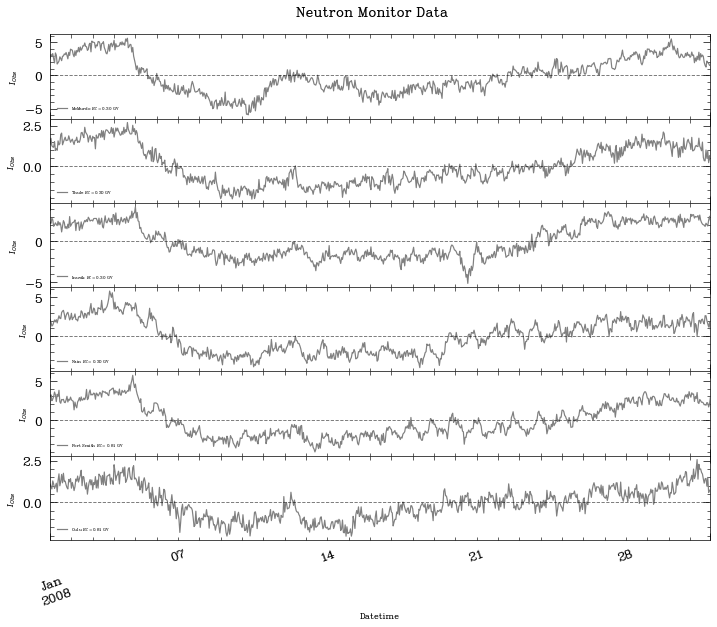

In [22]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)

fig, b = plt.subplots(6, 1, sharex=True, figsize=(10,8), tight_layout=False)
fig.suptitle('Neutron Monitor Data', fontsize=16)
fig.tight_layout()
dataset_nm_resample.plot(ax=b, subplots=True, rot=20, legend=False, color='gray')
b[0].set_ylabel('$I_{Obs}$', fontsize=10)
b[1].set_ylabel('$I_{Obs}$', fontsize=10)
b[2].set_ylabel('$I_{Obs}$', fontsize=10)
b[3].set_ylabel('$I_{Obs}$', fontsize=10)
b[4].set_ylabel('$I_{Obs}$', fontsize=10)
b[5].set_ylabel('$I_{Obs}$', fontsize=10)

b[0].legend(['McMurdo $R_{C}=0.30$ GV'], loc='lower left', fontsize=5)
b[1].legend(['Thule $R_{C}=0.30$ GV'], loc='lower left', fontsize=5)
b[2].legend(['Inuvik $R_{C}=0.30$ GV'], loc='lower left', fontsize=5)
b[3].legend(['Nain $R_{C}=0.30$ GV'], loc='lower left', fontsize=5)
b[4].legend(['Fort Smith $R_{C}=0.81$ GV'], loc='lower left', fontsize=5)
b[5].legend(['Oulu $R_{C}=0.81$ GV'], loc='lower left', fontsize=5)

b[0].axhline(y = 0.0, color = 'black', linestyle = '--', linewidth=0.5)
b[1].axhline(y = 0.0, color = 'black', linestyle = '--', linewidth=0.5)
b[2].axhline(y = 0.0, color = 'black', linestyle = '--', linewidth=0.5)
b[3].axhline(y = 0.0, color = 'black', linestyle = '--', linewidth=0.5)
b[4].axhline(y = 0.0, color = 'black', linestyle = '--', linewidth=0.5)
b[5].axhline(y = 0.0, color = 'black', linestyle = '--', linewidth=0.5)

plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('nm_February_2008(1).png')

plt.show()

In [24]:
dataset_nm_resample_txt = dataset_nm.resample('60min').mean()
dataset_nm_resample_txt = dataset_nm_resample.reset_index()  # !!!!

# Extract various components of Datetime:
dataset_nm_resample_txt['Year'] = dataset_nm_resample_txt['Datetime'].dt.year
dataset_nm_resample_txt['Month'] = dataset_nm_resample_txt['Datetime'].dt.month
dataset_nm_resample_txt['Day'] = dataset_nm_resample_txt['Datetime'].dt.day
dataset_nm_resample_txt['Hour'] = dataset_nm_resample_txt['Datetime'].dt.hour
dataset_nm_resample_txt['Minute'] = dataset_nm_resample_txt['Datetime'].dt.minute
dataset_nm_resample_txt['Second'] = dataset_nm_resample_txt['Datetime'].dt.second

dataset_nm_resample_txt = dataset_nm_resample_txt[['Datetime', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'MCMU', 'THUL', 'INVK', 'NAIN', 'FSMT', 'OULU']]
dataset_nm_resample_txt.set_index('Datetime', inplace=True)
display(dataset_nm_resample_txt)

,Year,Month,Day,Hour,Minute,Second,MCMU,THUL,INVK,NAIN,FSMT,OULU
Datetime,,,,,,,,,,,,
2008-01-01 00:00:00,2008,1,1,0,0,0,2.612574,1.330601,2.318192,2.094674,2.997005,1.091726
2008-01-01 01:00:00,2008,1,1,1,0,0,3.188574,1.703768,2.203358,1.830174,3.213505,0.946143
2008-01-01 02:00:00,2008,1,1,2,0,0,2.882408,1.237934,2.799858,1.302007,2.464839,0.808209
2008-01-01 03:00:00,2008,1,1,3,0,0,3.288741,1.170768,2.642525,1.421341,2.654005,1.291359
2008-01-01 04:00:00,2008,1,1,4,0,0,2.510741,1.144101,1.845358,1.769674,2.991339,1.102609
...,...,...,...,...,...,...,...,...,...,...,...,...
2008-01-31 19:00:00,2008,1,31,19,0,0,2.168574,0.458101,2.040858,1.999174,2.228005,0.977843
2008-01-31 20:00:00,2008,1,31,20,0,0,1.945574,0.917601,1.880025,1.598174,2.172172,1.502909
2008-01-31 21:00:00,2008,1,31,21,0,0,1.794741,0.186101,2.603525,1.183507,1.669672,0.591859


In [25]:
#dataset_nm_resample_txt.to_csv(r'/Users/eduardotiradobueno/Documents/data.txt', header=True, index=None, sep='\t', mode='w')

dataset_nm_resample_txt.to_csv(r'/Users/eduardotiradobueno/Documents/JAN2008.txt', header=True, index=None, sep='\t', mode='w')